# Engagement

In this notebook we will calculate the engagement coefficient for several movies.  This is based on the model in "Social Media Engagement and Cryptocurrency Performance"  https://arxiv.org/abs/2209.02911.



# Clones, installs, and imports


## Clone GitHub Repository
This will clone the repository to your machine.  This includes the code and data files.  Then change into the directory of the repository.

In [ ]:
!git clone https://github.com/zlisto/social_media_marketing

import os
os.chdir("social_media_marketing")

## Install Requirements


## Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
from scripts.TextAnalysis import *
pd.set_option("display.max_colwidth", None)

# Data Processing


We create a list `keywords` of the keywords that identify the tweets for each movie.  We then add a column `keyword` to the tweet dataframe `df` that has the keyword.  We also add binary `keyword_{keyword}` columns for each keyword.  We then add columns for the engagement of each interaction type (like, retweet, reply).  Engagement is the interaction count divided by the impression count.  Finally, we only keep the rows where the engagements are less than one (the Twitter API has some bugs where the impression count is less than the interaction count).


In [2]:
df = pd.read_csv("data/engagement_movies.csv")
keywords = ['#AntManAndTheWasp','#JohnWick4','#ShazamFuryOfTheGods',
            '#DungeonsAndDragons','#CreedIII','#ScreamVI','#KnockattheCabin',
           '#CocaineBear','#MarioMovie']

df['keyword'] = None
for keyword in keywords:
    ind =  df.text.str.contains(keyword, case=False)
    df[f'keyword_{keyword}'] = ind
    df.loc[ind, 'keyword'] = keyword
    print(f"{keyword}: {len(df[df[f'keyword_{keyword}']==True]):,} tweets ")

df['like_engagement'] = df.like_count/(df.impression_count+1)
df['retweet_engagement'] = df.retweet_count/(df.impression_count+1)
df['reply_engagement'] = df.reply_count/(df.impression_count+1)

df = df[df.like_engagement<=1]
df = df[df.retweet_engagement<=1]
df = df[df.reply_engagement<=1]

print(f"{len(df):,} total tweets")



#AntManAndTheWasp: 1,127 tweets 
#JohnWick4: 1,140 tweets 
#ShazamFuryOfTheGods: 1,199 tweets 
#DungeonsAndDragons: 1,032 tweets 
#CreedIII: 1,093 tweets 
#ScreamVI: 1,109 tweets 
#KnockattheCabin: 1,003 tweets 
#CocaineBear: 1,112 tweets 
#MarioMovie: 1,734 tweets 
12,504 total tweets


# Calculate Engagement Coefficients and Interaction Strengths

The function `engagement_estimate` in the `TextAnalytics.py` file will calculate the engagement coefficients and interaction strengths from the tweet dataframe `df`.  It returns a dataframe with the engagement coefficients (`df_e`).

In [3]:
df_e, _ = engagement_estimate(df)

# Plot Engagement Coefficients 

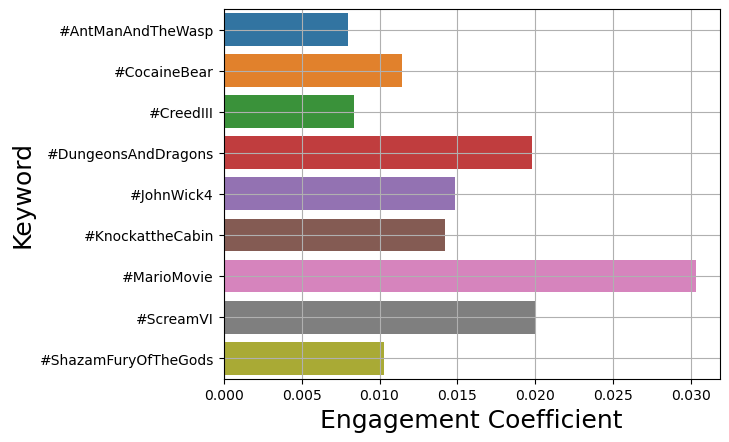

In [4]:
sns.barplot(data = df_e, y = 'keyword', x = 'alpha')
plt.xlabel('Engagement Coefficient', fontsize =18)
plt.ylabel('Keyword', fontsize =18)
plt.grid()
plt.show()

## Plot Movie Profit Margins

In [13]:
df_r = pd.read_csv("data/movie_engagement_revenue.csv")
df_r['profit'] = df_r.revenue - df_r.budget
df_r['profit_margin'] = df_r['profit']/df_r['budget']*100

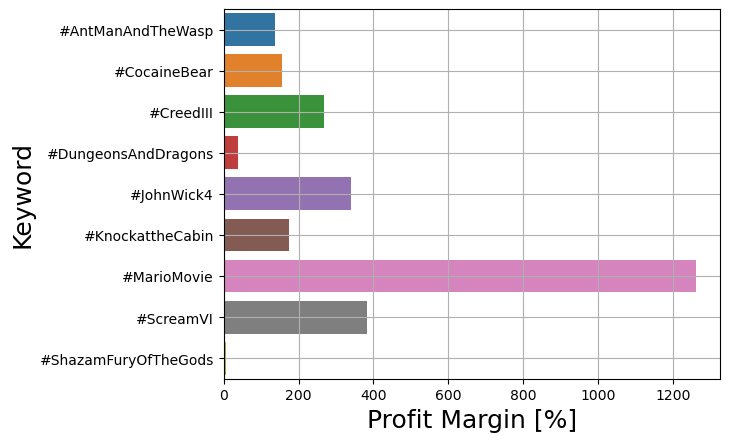

In [14]:
sns.barplot(data = df_r, y = 'keyword', x = 'profit_margin')
plt.xlabel('Profit Margin [%]', fontsize =18)
plt.ylabel('Keyword', fontsize =18)
plt.grid()
plt.show()